# Проектная работа 3 Курс 2021/2022

# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Проверка качества классификатора
   4. Дополнительная проверка качества классификатора
   5. Правка багов и аномалий (тестирование и исправление ошибок)
   6. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой^ можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

По реальным наблюдениям мы имее следующие коэффициенты для каждого поколения:

                                                Для молодых особей:
$
\alpha_J = 0.0016,
\beta_J = 0.0000007,
\gamma_J = 0.00008,
\delta_J = 0.000016
$

                                                Для взрослых особей:
$
\alpha_A = 0.006,
\beta_A = 0.000000075,
\gamma_A = 0.004,
\delta_A = 0.00006
$

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны взять ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

                Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))^2d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
                Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))^2d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $ - воспроизводство 

$ s = \gamma_{A}M_6 $ - уровень смертности молодых особей

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $ - созревание молодых особей

$ q = \gamma_{J}M_2 $ - уровень смертности взрослых особей

Теперь с полностью подготовленной математической частью мы создаем с помощью рандомной генерации в заданных диапазонах параметры $A$ и $B$ для каждой стадии, количество генерируемых стратегий выберем небольшим, чтобы не сильно нагружать оборудование. Далее мы в интегралы всех макропараметров подставляем известные значения и вычисляем их после чего имеем более простую формулу нахождения этих макропараметров:

$M_1 = \sigma_1(A_J + D)$

$M_2 = -\sigma_2(A_J+ D + B_J/2)$

$M_3 = -2(\pi B_J)^2$

$M_4 = -((A_J + D_0)^2 + B_J^2/2)$

$M_5 = \sigma_1(A_A + D)$

$M_6 = -\sigma_2(A_A + D + B_A/2)$

$M_7 = -2(\pi B_A)^2$

$M_8 = -((A_A + D_0)^2 + B_A^2/2)$

На следующем шаге мы считаем параметры $s,p,q,r$ и соответственно найти значения функции фитнеса $J$ и стоит добавить, что если подкоренное выражение окажется равным нулю, то мы заменим значение фитнеса не комплексным числом, а нулем. Далее мы считаем пары стратегий с известными значениями фитнеса для каждой стратегии и если $M_i(\upsilon) - M_j(\omega) < 0 $, то мы идентифицируем эту точку в класс $-1$, иначе мы определим ее в класс $1$. После у нас будет готова обучающая выборка для классификаторов и уже разделив ее на тестовую и обучающую мы сможем обучить наши классификаторы. На выходе они нам дадут 44 числа, которые являются коэффициентами при макропараметрах в неизвесной функции фитнеса:

$F = \sum_{i=1}^8 \lambda_i M_i + \sum_{i=1}^8 \sum_{j=1}^8 \lambda_{ij} M_i M_j$, где  $\lambda_{ij} =  \lambda_{ji}$

Концом данного этапа станет подсчет точности классификатора по с помощью стандартного подхода и логарифмической потери, а также создание двумерных и трехмерных графиков с разделяющими гиперплоскостями полученными с помощью классификаторов SMV и LDA.

## 2. Реализация

### 2.1 Подготовка всех исходных данных

In [337]:
# Обозначим эмпирические данные молодых особей
alpha_j = 0.0016
betta_j = 0.0000007
gamma_j = 0.00008
delta_j = 0.000016

# Обозначим эмпирические данные взрослых особей
alpha_a = 0.006
betta_a = 0.000000075
gamma_a = 0.004
delta_a = 0.00006

sigma1 = 1
sigma2 = 1
D = 120
D0 = 70
# И размер выборки
Nmax = 20

In [338]:
import random as rn
import pandas as pd
# Генерация параметров для стратегий
# Запись параметров в data_strat
def strategy(Nmax):
   def rand_strat():
      A, B = [], []
      for i in range(0, Nmax):
         a = rn.uniform(-D, 0)
         b = rn.uniform(0, min(-a, a + D))
         A.append(a)
         B.append(b)
         A.append(a)
         B.append(-b)
      return A, B

   A, B = rand_strat()
   data_strat1 = {'Aj': A, 'Bj': B}
   data1 = pd.DataFrame(data = data_strat1)
   A, B = rand_strat()
   data_strat2 = {'Aa': A, 'Ba': B}
   data2 = pd.DataFrame(data = data_strat2)
   data = pd.concat([data1, data2], axis=1)
   data.to_csv("data_strat.csv", index=False)
   return data
data_strat = strategy(Nmax)
data_strat

,Aj,Bj,Aa,Ba
0,-41.080314,2.421515,-39.446368,10.992402
1,-41.080314,-2.421515,-39.446368,-10.992402
2,-41.467575,29.584879,-108.388223,8.299915
3,-41.467575,-29.584879,-108.388223,-8.299915
4,-37.565957,35.861572,-51.121010,11.907108
5,-37.565957,-35.861572,-51.121010,-11.907108
6,-35.874518,3.423536,-26.794286,24.153310
7,-35.874518,-3.423536,-26.794286,-24.153310
8,-50.319066,6.265919,-89.810735,3.165393
9,-50.319066,-6.265919,-89.810735,-3.165393


In [339]:
import pandas as pd
import numpy as np
from collections import defaultdict
# Подсчет макропараметров
# Запись их в data_macro
def macroparams(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   collect = defaultdict(list)
   collect_M = defaultdict(list)
   collect_MM = defaultdict(list)
   for i in range(1, 9):
      collect['M' + str(i)] = []
   for i in range(0, len(data_strat)):
      collect['M1'].append(sigma1*(Aj[i] + D))
      collect['M2'].append(-sigma2*(Aj[i] + D + Bj[i]/2))
      collect['M3'].append(-2*(np.pi*Bj[i])**2)
      collect['M4'].append(-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      collect['M5'].append(sigma1*(Aa[i] + D))
      collect['M6'].append(-sigma2*(Aa[i] + D + Ba[i]/2))
      collect['M7'].append(-2*(np.pi*Ba[i])**2)
      collect['M8'].append(-((Aa[i] + D0)**2 + (Ba[i]**2)/2))
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            Z = np.array(collect['M' + str(i)])*np.array(collect['M' + str(i)])
            collect_M['M' + str(i) + 'M' + str(i)].append(list(Z))
         else:
            continue
   for i in range(2, 9):
      for j in range(1, i):
         Z = 2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
         collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))

   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      data['M' + str(i)] = collect['M' + str(i)]
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            data['M' + str(i) + 'M' + str(j)] = collect_M['M' + str(i) + 'M' + str(j)][0]
         else:
            continue
   for i in range(2, 9):
      for j in range(1, i):
         data['M' + str(i) + 'M' + str(j)] = collect_MM['M' + str(i) + 'M' + str(j)][0]
   data.to_csv("data_macro.csv", index=False)
   return data
data_macro = macroparams(data_strat)

In [340]:
import pandas as pd
from collections import defaultdict
# Подсчет фитнесса
# Запись в data_fit_macro
def fitness():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()      
   M3 = data_macro['M3'].tolist()   
   M4 = data_macro['M4'].tolist()   
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   J = []
   for i in range(len(data_strat)):
      r = alpha_a*M5[i] + betta_a*M7[i] + delta_a*M8[i]
      s = gamma_a*M6[i]
      p = alpha_j*M1[i] + betta_j*M3[i] + delta_j*M4[i]
      q = gamma_j*M2[i]
      if ((4*r*p + (p + q - s)**2) < 0):
         J.append(0)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         J.append(j)
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   data = data.loc[data.J !=0]
   data = data.reset_index(drop=True)
   data.to_csv('data_fit_macro.csv', index=False)
   return data

data_fit = fitness()
data_fit

,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M4,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7
0,0.865556,78.919686,-80.130444,-115.745479,-839.280116,80.553632,-86.049833,-2385.145708,-993.940898,6228.316867,...,4.003611e+06,-3.842643e+05,4.104828e+05,-156883.007462,159289.850165,2.300883e+05,1.668390e+06,-1.601311e+05,1.710569e+05,4.741388e+06
1,0.790750,78.919686,-77.708929,-115.745479,-839.280116,80.553632,-75.057432,-2385.145708,-993.940898,6228.316867,...,4.003611e+06,-3.842643e+05,3.580458e+05,-156883.007462,154476.164759,2.300883e+05,1.668390e+06,-1.601311e+05,1.492053e+05,4.741388e+06
2,0.097018,78.532425,-93.324864,-17277.040119,-1251.731805,11.611777,-15.761734,-1359.806122,-1508.099991,6167.341748,...,3.404225e+06,-3.157953e+04,4.286580e+04,-236869.498263,281486.454307,5.211101e+07,3.775473e+06,-3.502344e+04,4.754054e+04,4.101447e+06
3,0.019928,78.532425,-63.739985,-17277.040119,-1251.731805,11.611777,-7.461819,-1359.806122,-1508.099991,6167.341748,...,3.404225e+06,-3.157953e+04,2.029325e+04,-236869.498263,192252.542219,5.211101e+07,3.775473e+06,-3.502344e+04,2.250634e+04,4.101447e+06
4,0.747561,82.434043,-100.364829,-25385.656403,-1694.993317,68.878990,-74.832544,-2798.609625,-427.305879,6795.371402,...,9.487249e+06,-3.855308e+05,4.188542e+05,-70449.102107,85772.962820,2.169488e+07,1.448561e+06,-5.886479e+04,6.395277e+04,2.391725e+06
5,0.665926,82.434043,-64.503257,-25385.656403,-1694.993317,68.878990,-62.925436,-2798.609625,-427.305879,6795.371402,...,9.487249e+06,-3.855308e+05,3.522075e+05,-70449.102107,55125.241394,2.169488e+07,1.448561e+06,-5.886479e+04,5.377682e+04,2.391725e+06
6,1.004652,84.125482,-85.837250,-231.355409,-1170.408820,93.205714,-105.282369,-11515.506430,-2158.424920,7077.096715,...,2.695570e+07,-2.146622e+06,2.424760e+06,-363157.073290,370546.519712,9.987266e+05,5.052479e+06,-4.023551e+05,4.544882e+05,4.971071e+07
7,0.837120,84.125482,-82.413714,-231.355409,-1170.408820,93.205714,-81.129059,-11515.506430,-2158.424920,7077.096715,...,2.695570e+07,-2.146622e+06,1.868484e+06,-363157.073290,355767.626868,9.987266e+05,5.052479e+06,-4.023551e+05,3.502220e+05,4.971071e+07
8,0.370002,69.680934,-72.813893,-774.995579,-406.970033,30.189265,-31.771962,-197.781255,-397.475074,4855.432571,...,1.609821e+05,-1.194174e+04,1.256780e+04,-55392.868883,57883.415305,6.160829e+05,3.235209e+05,-2.399896e+04,2.525713e+04,1.572262e+05
9,0.348928,69.680934,-66.547975,-774.995579,-406.970033,30.189265,-28.606568,-197.781255,-397.475074,4855.432571,...,1.609821e+05,-1.194174e+04,1.131569e+04,-55392.868883,52902.322461,6.160829e+05,3.235209e+05,-2.399896e+04,2.274080e+04,1.572262e+05


In [341]:
# Классификатор попарных стратегий
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
# Подсчет попарных стратегий
# Запись в data_fit_macro_target
def data_class():
   data_fit_macro = fitness()
   target = []
   for i in range(len(data_fit.index)):
      for j in range(i + 1, len(data_fit.index)):
         differ1_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         differ2_ = data_fit_macro.loc[j] - data_fit_macro.loc[i]
         target1_ = classificator(differ1_)
         target2_ = classificator(differ2_)
         target.append(differ1_.append(pd.Series(target1_, index =['target'])))
         target.append(differ2_.append(pd.Series(target2_, index =['target'])))
   data = pd.DataFrame(data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data_fit_macro_target = data_class()
data_fit_macro_target


,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,0.074806,0.000000,-2.421515,0.000000,0.000000,0.000000,-10.992402,0.000000,0.000000,0.000000,...,0.000000,52436.959026,0.000000,4813.685407,0.000000e+00,0.000000e+00,0.000000,21851.595045,0.000000,1.0
1,-0.074806,0.000000,2.421515,0.000000,0.000000,0.000000,10.992402,0.000000,0.000000,0.000000,...,0.000000,-52436.959026,0.000000,-4813.685407,0.000000e+00,0.000000e+00,0.000000,-21851.595045,0.000000,-1.0
2,0.768538,0.387261,13.194421,17161.294640,412.451689,68.941856,-70.288099,-1025.339586,514.159093,60.975119,...,-352684.771276,367616.976066,79986.490801,-122196.604142,-5.188092e+07,-2.107084e+06,-125107.659111,123516.355457,639940.533204,1.0
3,-0.768538,-0.387261,-13.194421,-17161.294640,-412.451689,-68.941856,70.288099,1025.339586,-514.159093,-60.975119,...,352684.771276,-367616.976066,-79986.490801,122196.604142,5.188092e+07,2.107084e+06,125107.659111,-123516.355457,-639940.533204,-1.0
4,0.845628,0.387261,-16.390458,17161.294640,412.451689,68.941856,-78.588014,-1025.339586,514.159093,60.975119,...,-352684.771276,390189.525513,79986.490801,-32962.692054,-5.188092e+07,-2.107084e+06,-125107.659111,148550.557810,639940.533204,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,0.559165,-54.066782,27.027508,-4103.492894,627.500319,63.629428,-69.437553,112.270239,78.530646,-6138.121248,...,-73797.299820,81573.656231,120231.064531,-64712.095424,6.170365e+06,-1.471604e+06,-123244.032982,135221.337608,-335919.142629,1.0
926,-0.517283,54.066782,-55.988851,4103.492894,-627.500319,-63.629428,63.874243,-112.270239,-78.530646,6138.121248,...,73797.299820,-74775.998396,-120231.064531,122064.911410,-6.170365e+06,1.471604e+06,123244.032982,-124204.188160,335919.142629,-1.0
927,0.517283,-54.066782,55.988851,-4103.492894,627.500319,63.629428,-63.874243,112.270239,78.530646,-6138.121248,...,-73797.299820,74775.998396,120231.064531,-122064.911410,6.170365e+06,-1.471604e+06,-123244.032982,124204.188160,-335919.142629,1.0
928,0.041882,0.000000,-28.961343,0.000000,0.000000,0.000000,-5.563309,0.000000,0.000000,0.000000,...,0.000000,6797.657835,0.000000,57352.815985,0.000000e+00,0.000000e+00,0.000000,11017.149448,0.000000,1.0


In [342]:
import numpy as np
from collections import defaultdict
# Нормируем макропараметры для увеличения скорости классификатора
# Запись нормированных данных в data_norm_with_target
def macro_norm(data_param):
   target = data_param['target'].tolist()
   max_M = []
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      max_M.append(max(np.abs(data_param['M' + str(i)].tolist())))
      Z = list(np.array(data_param['M' + str(i)].tolist())/max(np.abs(data_param['M' + str(i)].tolist())))
      data['M' + str(i) + '_n'] = Z
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            max_M.append(max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist())))
            Z = np.array(data_param['M' + str(i) + 'M' + str(j)].tolist())/max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist()))
            data['M' + str(i) + 'M' + str(j) + '_n'] = Z
         else:
            continue   
   for i in range(2, 9):
      for j in range(1, i):
         max_M.append(max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist())))
         Z = np.array(data_param['M' + str(i) + 'M' + str(j)].tolist())/max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist()))
         data['M' + str(i) + 'M' + str(j) + '_n'] = Z
   data['target'] = target
   data.to_csv("data_norm_with_target.csv", index=False)
   return data, max_M
   
data_norm, Max_M = macro_norm(data_fit_macro_target)
data_norm

,M1_n,M2_n,M3_n,M4_n,M5_n,M6_n,M7_n,M8_n,M1M1_n,M2M2_n,...,M7M5_n,M7M6_n,M8M1_n,M8M2_n,M8M3_n,M8M4_n,M8M5_n,M8M6_n,M8M7_n,target
0,0.000000,-0.021908,0.000000,0.000000,0.000000,-0.093769,0.000000,0.000000,0.000000,0.028925,...,0.000000,0.011974,0.000000,0.006742,0.000000,0.000000,0.000000,0.018933,0.000000,1.0
1,0.000000,0.021908,0.000000,0.000000,0.000000,0.093769,0.000000,0.000000,0.000000,-0.028925,...,0.000000,-0.011974,0.000000,-0.006742,0.000000,0.000000,0.000000,-0.018933,0.000000,-1.0
2,0.003581,0.119373,0.502525,0.112271,0.601695,-0.599580,-0.046103,0.115228,0.004715,-0.173199,...,-0.097087,0.083945,0.122252,-0.171158,-0.468756,-0.158706,-0.109484,0.107016,0.009186,1.0
3,-0.003581,-0.119373,-0.502525,-0.112271,-0.601695,0.599580,0.046103,-0.115228,-0.004715,0.173199,...,0.097087,-0.083945,-0.122252,0.171158,0.468756,0.158706,0.109484,-0.107016,-0.009186,-1.0
4,0.003581,-0.148288,0.502525,0.112271,0.601695,-0.670381,-0.046103,0.115228,0.004715,0.178455,...,-0.097087,0.089099,0.122252,-0.046170,-0.468756,-0.158706,-0.109484,0.128706,0.009186,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,-0.499987,0.244524,-0.120160,0.170808,0.555331,-0.592325,0.005048,0.017599,-0.474682,-0.236139,...,-0.020315,0.018627,0.183763,-0.090641,0.055751,-0.110841,-0.107854,0.117158,-0.004822,1.0
926,0.499987,-0.506545,0.120160,-0.170808,-0.555331,0.544868,-0.005048,-0.017599,0.474682,0.366463,...,0.020315,-0.017075,-0.183763,0.170973,-0.055751,0.110841,0.107854,-0.107612,0.004822,-1.0
927,-0.499987,0.506545,-0.120160,0.170808,0.555331,-0.544868,0.005048,0.017599,-0.474682,-0.366463,...,-0.020315,0.017075,0.183763,-0.170973,0.055751,-0.110841,-0.107854,0.107612,-0.004822,1.0
928,0.000000,-0.262020,0.000000,0.000000,0.000000,-0.047457,0.000000,0.000000,0.000000,0.130323,...,0.000000,0.001552,0.000000,0.080333,0.000000,0.000000,0.000000,0.009545,0.000000,1.0


### 2.2 Реализация машинного обучения для SVM и LDA

In [343]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Разедляем данные на обучающую и тестовую выборки
X = data_norm.drop('target', axis=1)
y = data_norm['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [344]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]

In [345]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]

In [346]:
# Подсчет точности SVM и LDA
from sklearn.metrics import accuracy_score
from sklearn import model_selection
print('Точность классификатора:')
print('     SVM: ', accuracy_score(SVC_prediction, y_test))
print('     LDA: ', accuracy_score(LDA_prediction, y_test))

SVM = model_selection.cross_val_score(SVC_model, X, y)
LDA = model_selection.cross_val_score(LDA_model, X, y)
print('Логарифмическая потеря:')
print('     SVM: ', SVM.mean())
print('     LDA: ', LDA.mean())



Точность классификатора:
     SVM:  0.9946236559139785
     LDA:  0.989247311827957
Логарифмическая потеря:
     SVM:  0.9526881720430108
     LDA:  0.9311827956989248


### 2.3 Графики 

#### 2.3.1 Двумерные

In [347]:
# Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data.loc[:,'M1_n':'M8M7_n']
# y=data.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

In [348]:
""" # Вывод части графиков
import matplotlib.pyplot as plt
X=data_norm.loc[:,'M1_n':'M8M7_n']
y=data_norm.loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(0, 8):
    for j in range(i + 1, 4):
        x=np.linspace(-1, 1)
        plt.figure(figsize=(7, 7))
        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')
        plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.legend()
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.grid()
        plt.show() """

" # Вывод части графиков\nimport matplotlib.pyplot as plt\nX=data_norm.loc[:,'M1_n':'M8M7_n']\ny=data_norm.loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(0, 8):\n    for j in range(i + 1, 4):\n        x=np.linspace(-1, 1)\n        plt.figure(figsize=(7, 7))\n        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')\n        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')\n        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')\n        plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')\n        plt.xlim(-1,1)\n        plt.ylim(-1,1)\n        plt.legend()\n        plt.xlabel(X.columns[i])\n        plt.ylabel(X.columns[j])\n        plt.grid()\n        plt.show() "

#### 2.3.2 Трехмерные

In [349]:
# Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data.loc[:,'M1_n':'M8M7_n']
# y=data.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(len(X.columns)):
#         for k in range(len(X.columns)):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.legend()
#             plt.grid()
#             plt.show()

In [350]:
# Вывод части графиков
""" import matplotlib.pyplot as plt
X=data_norm.loc[:,'M1_n':'M8M7_n']
y=data_norm.loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(0, 5):
    for j in range(0, 4):
        for k in range(0, 3):
            if i == j or j == k or i == k:
                continue
            u, v = np.mgrid[-1:1:20j, -1:1:20j]
            fig = plt.figure(figsize=(10, 10))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
            ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
            ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
            ax.set_xlabel(X.columns[i])
            ax.set_ylabel(X.columns[j])
            ax.set_zlabel(X.columns[k])
            plt.grid()
            plt.show() """

" import matplotlib.pyplot as plt\nX=data_norm.loc[:,'M1_n':'M8M7_n']\ny=data_norm.loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(0, 5):\n    for j in range(0, 4):\n        for k in range(0, 3):\n            if i == j or j == k or i == k:\n                continue\n            u, v = np.mgrid[-1:1:20j, -1:1:20j]\n            fig = plt.figure(figsize=(10, 10))\n            ax = fig.add_subplot(111, projection='3d')\n            ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')\n            ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')\n            ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')\n            ax.set_xlabel(X.columns[i])\n            ax.set_ylabel(X.columns[j])\n            ax.set_zlabel(X.columns[k])\n            plt.grid()\n            plt.show() "

# Этап 2 | Проверка по Тейлору | Поиск оптимальной траектории | Финальная проверка

## 1. Теоретический модуль

Для проверки качества классификатора мы воспользуемся разложением по Тейлору до второго порядка функции $J$ в окрестности точки с наибольшим значением фитнеса, раскладывать будем по $s,p,q,r$. В качестве средний точки будем брать $s_0,p_0,q_0,r_0$, а подсчитанную производную в этой точке назовем $h$, тогда:

$J = h_ss + h_pp + h_qq + h_rr + h_{ss}s^2 + h_{pp}p^2 + h_{qq}q^2 + h_{rr}r^2 + h_{sp}sp + h_{sq}sq + h_{sr}sr + h_{pq}pq + h_{pr}pr + h_{qr}qr$

*Тут мы опустили из рассмотрения нулевую производную и прочие числа

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $

$ s = \gamma_{A}M_6 $

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $

$ q = \gamma_{J}M_2 $

Теперь подставив заместо $s,p,q,r$ их определения через макропараметры мы получим функцию зависимую от $M$ с какими-то коэффициентами и их мы сравним с $\lambda$ и проверим качество классификатора (Стоит сделать уточнение, что мы рассматриваем результаты только одного классификатора - SVM, так как LDA показал потерю точности при большом размере выборки и дальнейшая работа с ним дала бы слишком большие неточности) 

## 2. Проверка по Тейлору функции фитнеса J 

In [351]:
import pandas as pd
import numpy as np
# Заново считаем J с s,p,q,r
def middle_SPQR(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   data = {}
   data_middle_SPQR = pd.DataFrame(data)
   for i in range(0, len(data_strat)):
      M1 = (sigma1*(Aj[i] + D))
      M2 = (-sigma2*(Aj[i] + D + Bj[i]/2))
      M3 = (-2*((np.pi**2)*(Bj[i]**2)))
      M4 = (-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      M5 = (sigma1*(Aa[i] + D))
      M6 = (-sigma2*(Aa[i] + D + Ba[i]/2))
      M7 = (-2*((np.pi**2)*(Ba[i]**2)))
      M8 = (-((Aa[i] + D0)**2 + (Ba[i]**2)/2))

      s = gamma_a*M6
      p = alpha_j*M1 + betta_j*M3 + delta_j*M4
      q = gamma_j*M2
      r = alpha_a*M5 + betta_a*M7 + delta_a*M8
      if ((4*r*p + (p + q - s)**2) < 0):
         row = {'J': 0, 'S': s, 'P': p, 'Q': q, 'R': r, 'A_J': Aj[i], 'B_J': Bj[i], 'A_A': Aa[i], 'B_A': Ba[i]}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         row = {'J': j, 'S': s, 'P': p, 'Q': q, 'R': r, 'A_J': Aj[i], 'B_J': Bj[i], 'A_A': Aa[i], 'B_A': Ba[i]}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
   data_middle_SPQR.to_csv('data_middle_SPQR.csv', index=False)
   data_middle_SPQR = data_middle_SPQR.sort_values(by='J', ascending=False)
   return data_middle_SPQR 

data = middle_SPQR(data_strat)
data

,J,S,P,Q,R,A_J,B_J,A_A,B_A
28,1.094656,-0.479371,0.102544,-0.006027,0.426688,-50.296826,11.267585,-0.289494,0.264243
29,1.092572,-0.478314,0.102544,-0.005126,0.426688,-50.296826,-11.267585,-0.289494,-0.264243
6,1.004652,-0.421129,0.115712,-0.006867,0.428865,-35.874518,3.423536,-26.794286,24.153310
30,0.932016,-0.375481,0.117082,-0.009089,0.443811,-6.498751,0.222670,-29.158877,6.058456
31,0.890360,-0.351248,0.117082,-0.009071,0.443811,-6.498751,-0.222670,-29.158877,-6.058456
0,0.865556,-0.344199,0.112762,-0.006410,0.423506,-41.080314,2.421515,-39.446368,10.992402
34,0.855465,-0.393820,0.039950,-0.003095,0.394372,-88.635639,14.640524,-38.328622,33.567444
18,0.840981,-0.405195,0.014746,-0.002340,0.449040,-98.863990,16.222462,-21.310278,5.217985
7,0.837120,-0.324516,0.115712,-0.006593,0.428865,-35.874518,-3.423536,-26.794286,-24.153310
19,0.800632,-0.384323,0.014746,-0.001042,0.449040,-98.863990,-16.222462,-21.310278,-5.217985


In [356]:
import pandas as pd
import numpy as np
z = 28
def differential():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   r = alpha_a*M5[z] + betta_a*M7[z] + delta_a*M8[z]
   s = gamma_a*M6[z]
   p = alpha_j*M1[z] + betta_j*M3[z] + delta_j*M4[z]
   q = gamma_j*M2[z]

   # Частные производные первого порядка
   hs = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hp = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hq = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hr = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
   # Частные производные второго порядка
   hss = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hpp = (-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hqq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hrr = -4.0*p**2/(4*p*r + (p + q - s)**2)**1.5
   # Частные производные второго порядка | другие
   hsp = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
   hsq = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
   hsr = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
   hpq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hpr = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
   hqr = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5

   """ J = hs*s + hp*p + hq*q + hr*r + hss*s*s + hpp*p*p + hqq*q*q + hrr*r*r + hsp*s*p + hsq*s*q + hsr*s*r + hpq*p*q + hpr*p*r + hqr*q*r """
   return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr
hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential()
z = alpha_j
l = SVC_coef[0]/Max_M[0]/hp
print(alpha_j, '           ', SVC_coef[0]/Max_M[0]/hp)
print(gamma_j, '           ', SVC_coef[1]/Max_M[1]/hq)
print(betta_j, '           ', SVC_coef[2]/Max_M[2]/hp)
print(delta_j, '           ', SVC_coef[3]/Max_M[3]/hp)
print(alpha_a, '           ', SVC_coef[4]/Max_M[4]/hr)
print(gamma_a, '           ', SVC_coef[5]/Max_M[5]/hs)
print(betta_a, '           ', SVC_coef[6]/Max_M[6]/hr)
print(delta_a, '           ', SVC_coef[7]/Max_M[7]/hr)



0.0016             -0.003441969545169348
8e-05             0.0012048735990271156
7e-07             8.34096712272221e-06
1.6e-05             2.8203328474690866e-06
0.006             0.057251963908495636
0.004             0.013421623238378122
7.5e-08             -1.4566154315833865e-05
6e-05             0.0003281083519106074


Эмпирические
7.051655 25.77948824671209
-30.243356 -3.7560238440974207
SVM
7.051655 13.544526582932152
-30.243356 5.519616789279793


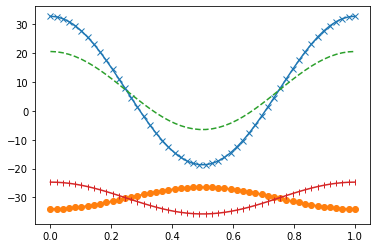

In [364]:
alpha_1 = SVC_coef[0]/Max_M[0]/hp
gamma_1 = SVC_coef[1]/Max_M[1]/hq
betta_1 = SVC_coef[2]/Max_M[2]/hp
delta_1 = SVC_coef[3]/Max_M[3]/hp
alpha_2 = SVC_coef[4]/Max_M[4]/hr
gamma_2 = SVC_coef[5]/Max_M[5]/hs
betta_2 = SVC_coef[6]/Max_M[6]/hr
delta_2 = SVC_coef[7]/Max_M[7]/hr

import numpy as np
import random as rn 
import matplotlib.pyplot as plt

alpha_j = 0.0016
betta_j = 0.0000007
gamma_j = 0.00008
delta_j = 0.000016

alpha_a = 0.006
betta_a = 0.000000075
gamma_a = 0.004
delta_a = 0.00006

sigma1 = 1
sigma2 = 1
D = 120
D0 = 70

t = np.linspace(0, 1)
#Какие то стандартные значения из таблицы макс фитнеса, ну или просто 
Aj = -30.243356
Aa = 7.051655

Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
x1 = Aa + Ba*np.cos(2*np.pi*t)

Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
x2 = Aj + Bj*np.cos(2*np.pi*t)

print('Эмпирические')
print(Aa, Ba)
print(Aj, Bj)


Ba = -(alpha_2*sigma1 - 2*delta_2*(Aa + D0))/(2*(4*(np.pi**2)*betta_2 + delta_2))
x3 = Aa + Ba*np.cos(2*np.pi*t)

Bj = -(alpha_1*sigma1 - 2*delta_1*(Aj + D0))/(2*(4*(np.pi**2)*betta_1 + delta_1))
x4 = Aj + Bj*np.cos(2*np.pi*t)

print('SVM')
print(Aa, Ba)
print(Aj, Bj)
plt.plot(t, x1, '-x') #Пожилые
plt.plot(t, x2, '-o') #Молодые
plt.plot(t, x3, '--') #Пожилые
plt.plot(t, x4, '-|') #Молодые
plt.show()

In [355]:
from sympy import *

s, p, q, r = symbols('s p q r')
print(diff(diff(-s - p - q + (4*r*p + (p + q - s)**2)**(1/2), q), r))


-2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5


In [ ]:
12123123